In [2]:
# Import my .py code 
# Run this to reimport without having to restart the whole notebook
import jakob_calib
import importlib
importlib.reload(jakob_calib)
from jakob_calib import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm as tqdm

plt.rcParams['font.size'] = 16
plt.rc("font", family="serif")

#### Plot one order

Text(0, 0.5, 'Wavelength / Å')

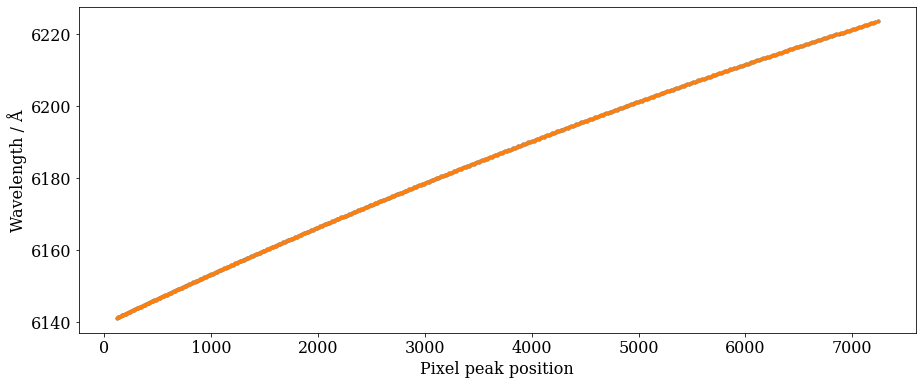

In [4]:
filename = r"expres_tp/LFC_200907.1063.fits"
hdu1 = fits.open(filename)

order = 61
data = hdu1[1].data.copy()
data_spec       = data['spectrum'][order]
data_spec_err   = data['uncertainty'][order]
data_wavel      = data['wavelength'][order]

# Find peaks
peak_info = func_find_peaks(data_spec, 11, 0.15)
peak_locs = peak_info[0]

# Create data slices around each peak
peak_index_ranges = get_peak_index_ranges(peak_locs, peak_range_size = 14)    # TODO: find dynamic way of choosing range size

# Fit peak in each data slice
peak_fits = fit_peaks(data_spec, data_spec_err, peak_index_ranges)

# Get list of true wavelengths
wavel_true = get_true_wavel(data_wavel, peak_locs)

# Plot
plt.figure(figsize=(15,6))
plt.plot(peak_locs, wavel_true, ".")
plt.plot(np.asarray(peak_fits)[:,1], wavel_true, ".")
plt.xlabel("Pixel peak position")
plt.ylabel("Wavelength / Å")

#### Analyze all orders

In [5]:
# Load data
filename = r"expres_tp/LFC_200907.1063.fits"
hdu1 = fits.open(filename)

data = hdu1[1].data.copy()

# order = 61
orders = np.arange(0, len(data['spectrum']))

all_peak_fits = []
all_wavel_true = []

results = []

for order in tqdm.tqdm(orders):
    data_spec       = data['spectrum'][order]
    data_spec_err   = data['uncertainty'][order]
    data_wavel      = data['wavelength'][order]

    # Find peaks
    peak_info = func_find_peaks(data_spec, 11, 0.15)
    peak_locs = peak_info[0]

    if len(peak_locs) == 0:
        # all_peak_fits.append([np.nan, np.nan, np.nan, np.nan, np.nan])
        # all_wavel_true.append([np.nan])
        results.append([order, [[np.nan]], [[np.nan]] ])
        continue

    # Create data slices around each peak
    peak_index_ranges = get_peak_index_ranges(peak_locs, peak_range_size = 14)    # TODO: find dynamic way of choosing range size

    # Fit peak in each data slice
    peak_fits = fit_peaks(data_spec, data_spec_err, peak_index_ranges)
    # all_peak_fits.append(peak_fits)

    # Get list of true wavelengths
    wavel_true = get_true_wavel(data_wavel, peak_locs)
    # all_wavel_true.append(wavel_true)

    results.append([order, peak_fits, wavel_true])

    # Plot
    # plt.figure(figsize=(8,4))
    # plt.plot(peak_locs, wavel_true, ".")
    # plt.plot(np.asarray(peak_fits)[:,1], wavel_true, ".")
    # plt.xlabel("Pixel peak position")
    # plt.ylabel("Wavelength / Å")

results = np.asarray(results)

100%|██████████| 86/86 [00:18<00:00,  4.59it/s] 
/var/folders/pd/q4f8j97x0gv_zjtmdgf4r3g00000gn/T/ipykernel_1562/2573791826.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  results = np.asarray(results)


Text(0.5, 1.0, 'Number of peaks per order')

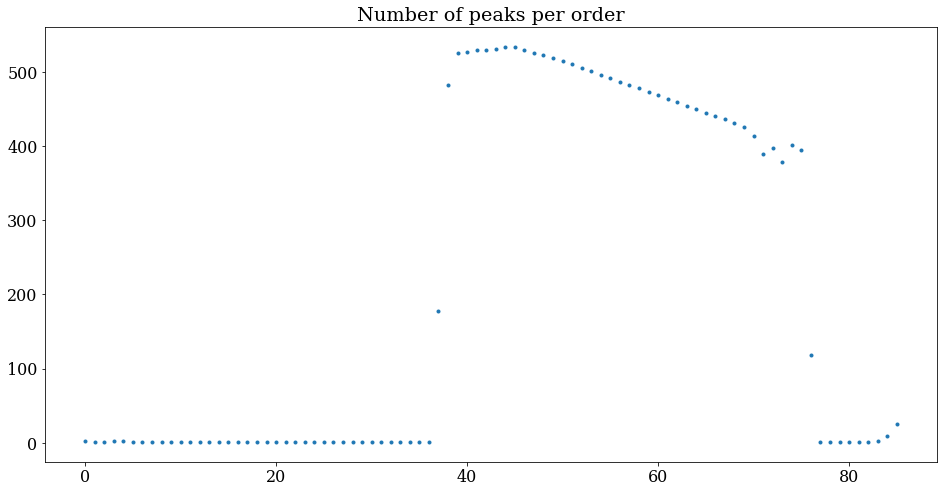

In [6]:
# Plot number of peaks per order
plt.figure(figsize=(16,8))
plt.plot(np.arange(len(results[:, 1])), [len(k) for k in results[:, 1]], ".")
plt.title("Number of peaks per order")

In [7]:
# TODO :: find way to compute mean chi2 for each order

# chi2_val_means = []
# for fit_vals in results[:, 1]:
#     print(fit_vals)
    # order_chi2 = []
    # for fit_val in fit_vals:
    #     if len(fit_val) > 1:
    #         order_chi2.append(fit_val[4])
    # chi2_val_means.append(np.mean(order_chi2))
    

    # if len(k) == 4:
    #     print(k)

# for res in results:
#     if res[]

#     if not np.isnan(peak_fit[0][0]):
#         chi2_vals = peak_fit[:, 4]
#         chi2_val_means.append(np.mean(chi2_vals))

# plt.figure(figsize=(16,8))
# plt.plot(np.arange(len(chi2_val_means)), chi2_val_means, ".")
# plt.title("Number of peaks per order")


### Fit peak positions

/var/folders/pd/q4f8j97x0gv_zjtmdgf4r3g00000gn/T/ipykernel_1562/1580320700.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,4))


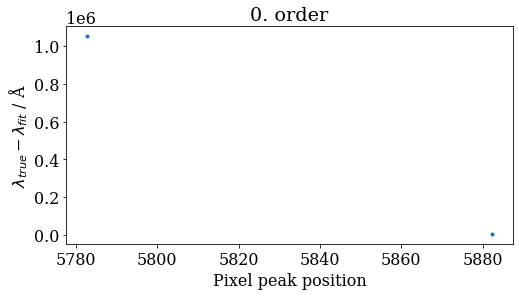

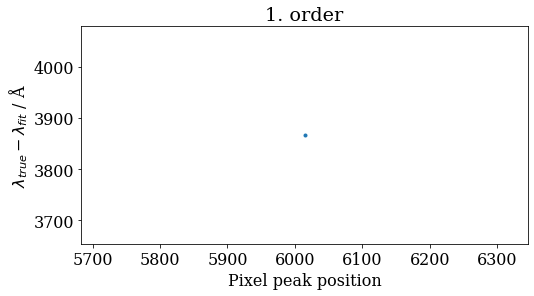

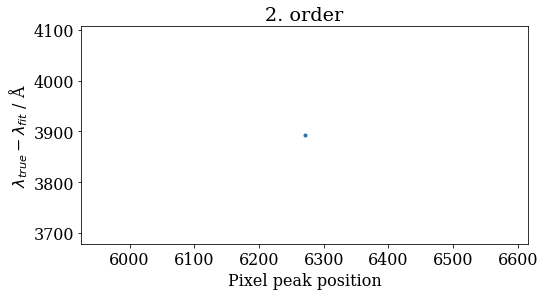

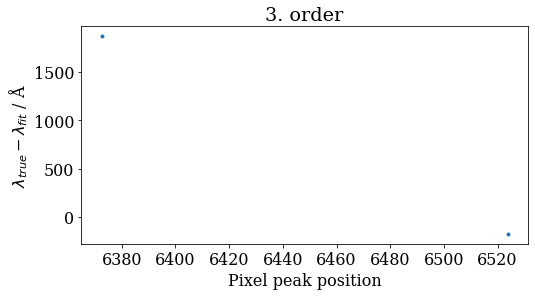

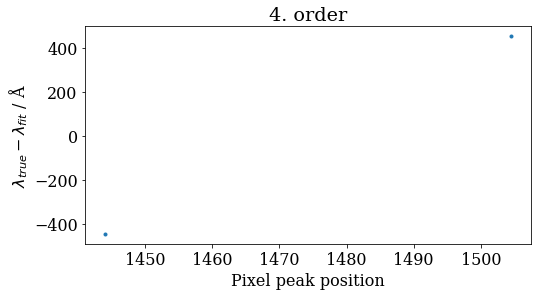

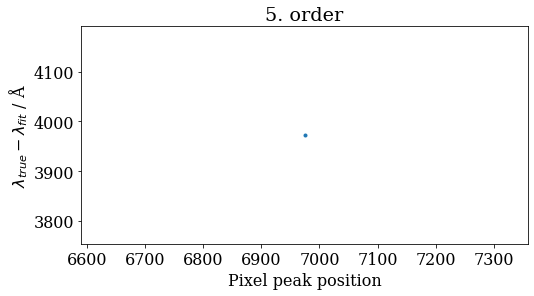

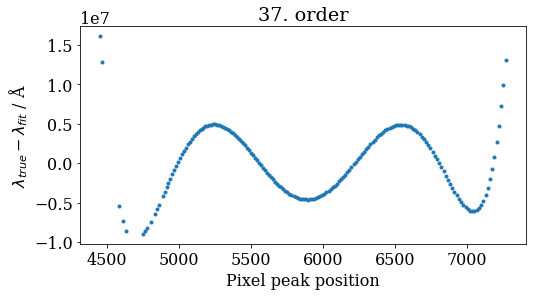

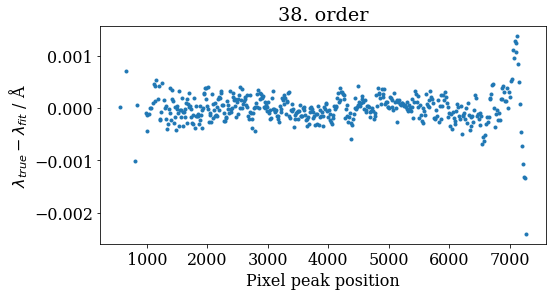

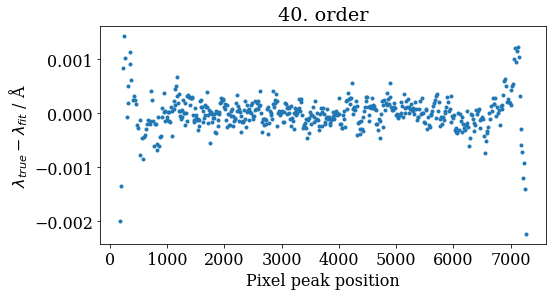

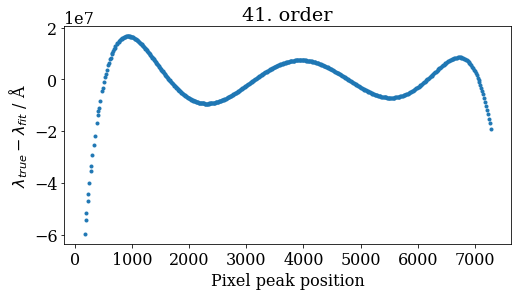

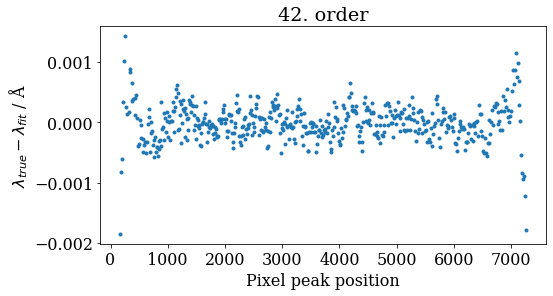

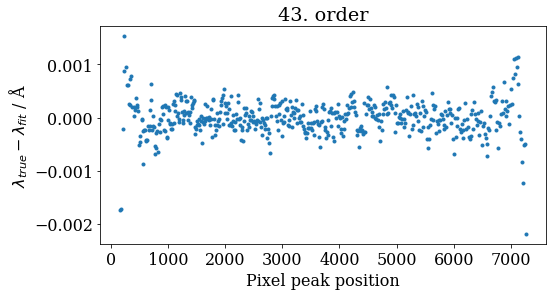

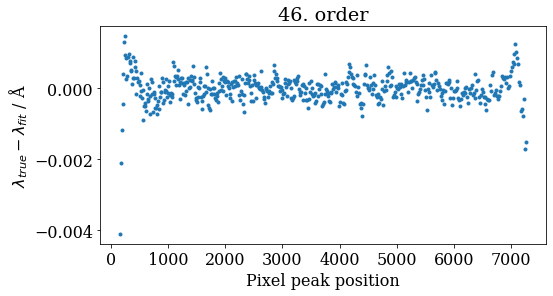

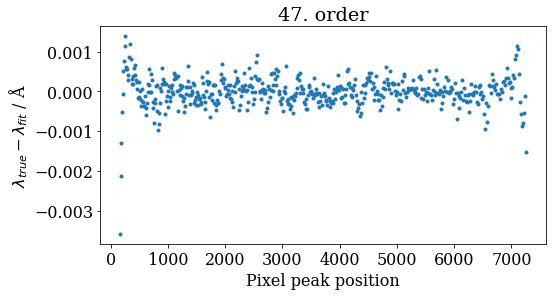

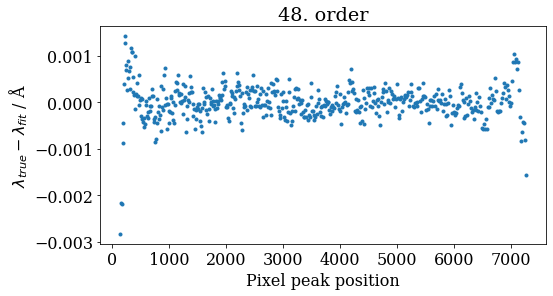

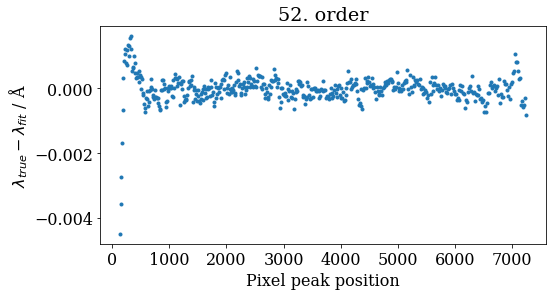

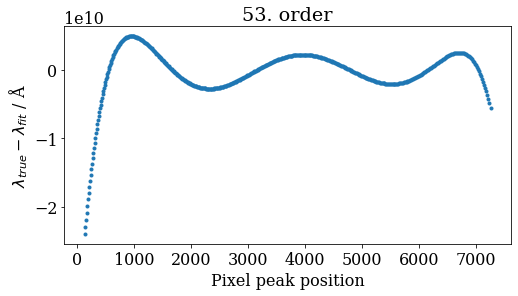

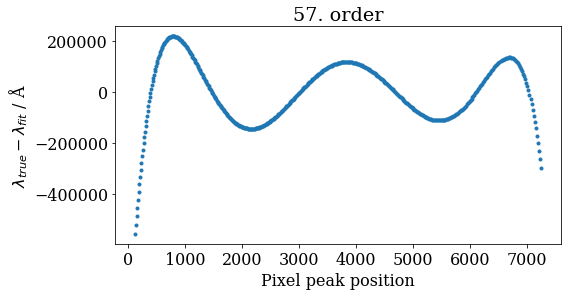

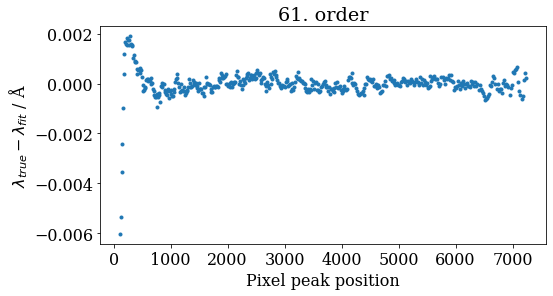

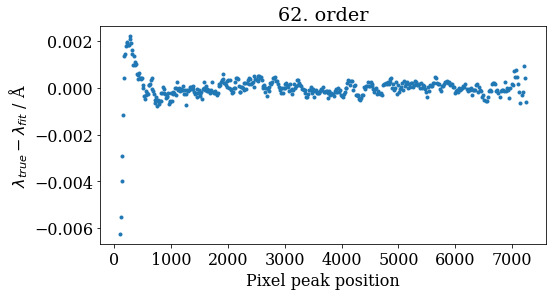

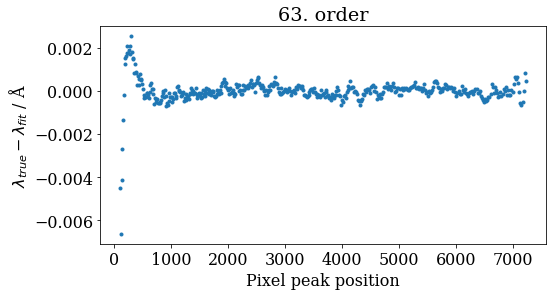

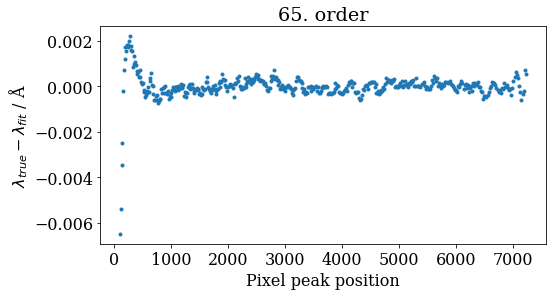

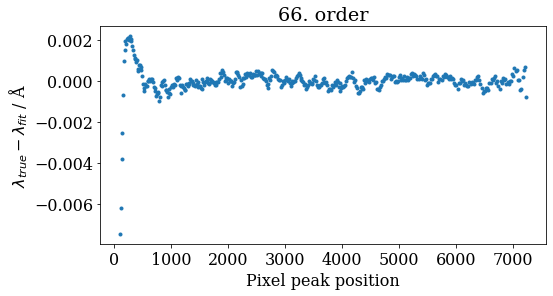

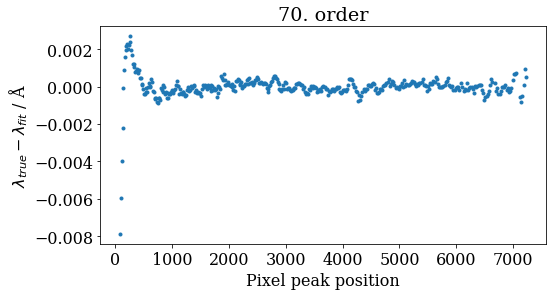

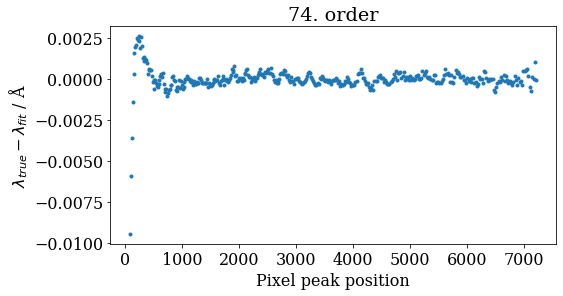

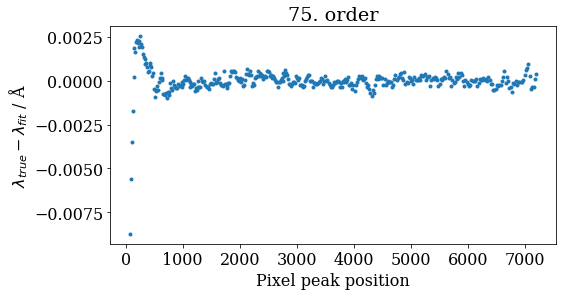

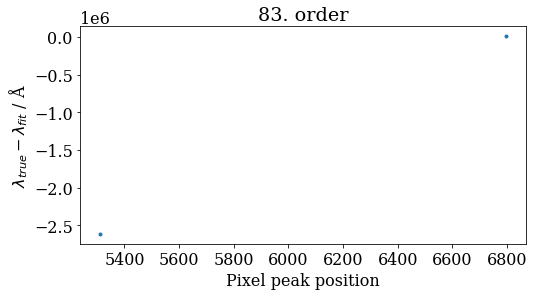

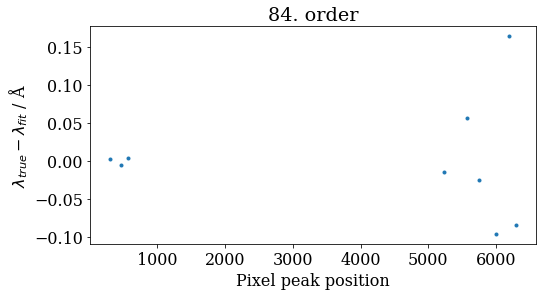

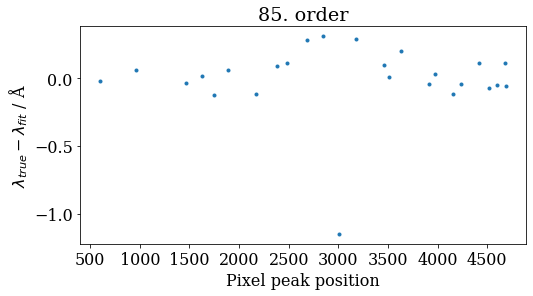

In [8]:
peak_pos_residuals = []
for result in results:
    order, peak_fit, wavel_true = result
    
    if np.isnan(peak_fit).any(): # leave out orders with no peaks 
        continue

    peak_pos_fit = fit_peak_positions(wavel_true, peak_fit)

    x = np.asarray(peak_fit)[:,1]
    peak_pos_residuals.append(wavel_true - peak_position_fit_func(x, *peak_pos_fit))

    plt.figure(figsize=(8,4))
    x = np.asarray(peak_fit)[:,1]
    plt.plot(x, wavel_true - peak_position_fit_func(x, *peak_pos_fit), ".")
    plt.title(f"{order}. order")
    plt.xlabel("Pixel peak position")
    plt.ylabel("$\lambda_{true} - \lambda_{fit} $ / Å")


peak_pos_residuals = np.asarray(peak_pos_residuals, dtype=object)

### Plot distribution of peak residuals ($\lambda_{true} - \lambda_{fit}$)


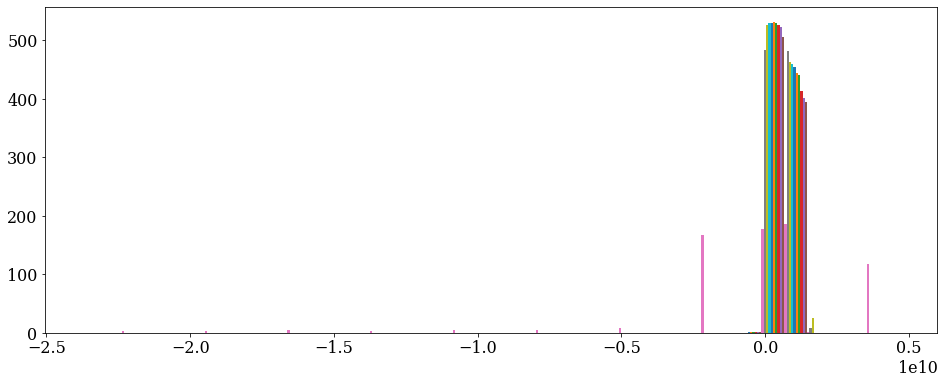

In [9]:
plt.figure(figsize=(16,6))
plt.hist(peak_pos_residuals);
# plt.xlim(-0.5e10, 0.5e10)